- 딥러닝 프레임워크를 사용하지 않으면서 원리 중심으로 딥러닝을 접근, numpy만 이용해서 구현해볼 예정
- 소프트웨어를 만드는 아래와 같은 단계에서
Analysis -> Design -> Implementation -> Test
딥러닝 프레임워크는 Implementation과 Test를 쉽게 해주는 역할을 맡고 있음.
- 딥러닝 원리를 아는 방법이 필요한 이유
: 딥러닝에서는 Implementation과 Test를 피드백하는 과정에서 시간이 오래 걸림. 논문을 읽을 때 Analysis와 Design 단계에서 취사선택을 잘 할 수 있다면  Implementation-Test단계의 시행착오를 줄일 수 있음  

어떤 숫자가 들어왔을 때 어떻게 설계를 해야할지에 대한 인사이트를 얻는 것이 이 강의의 목표

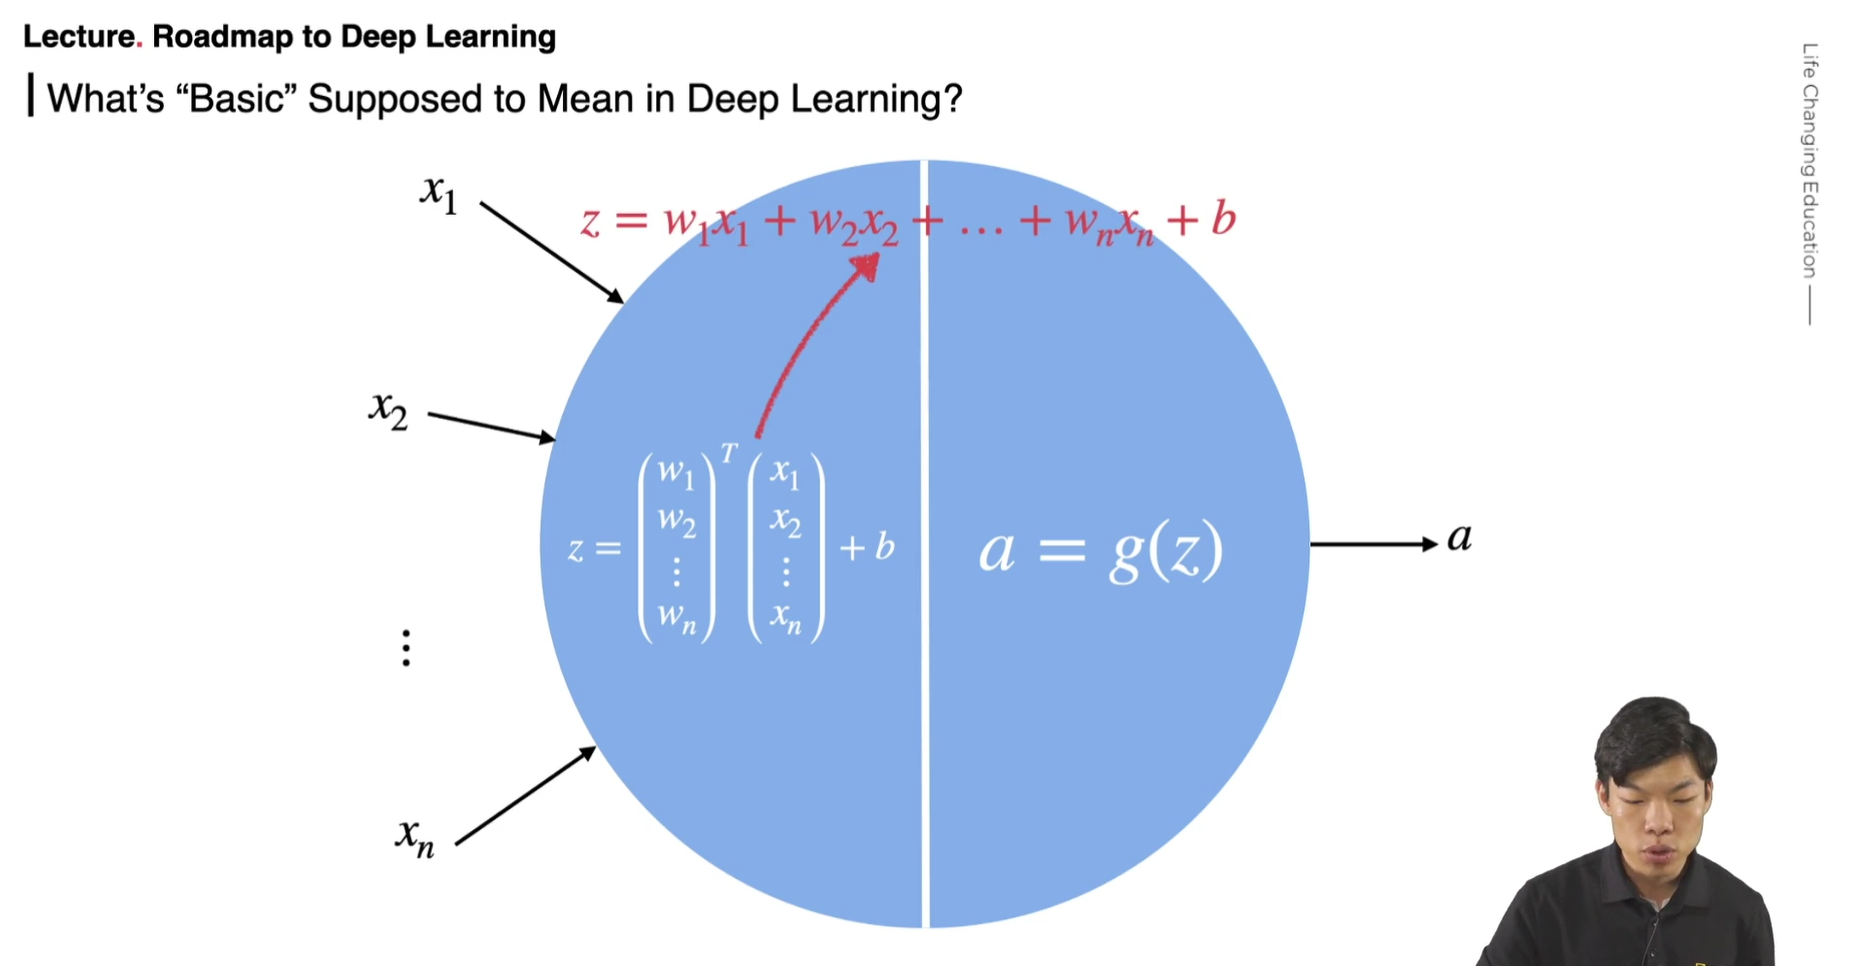

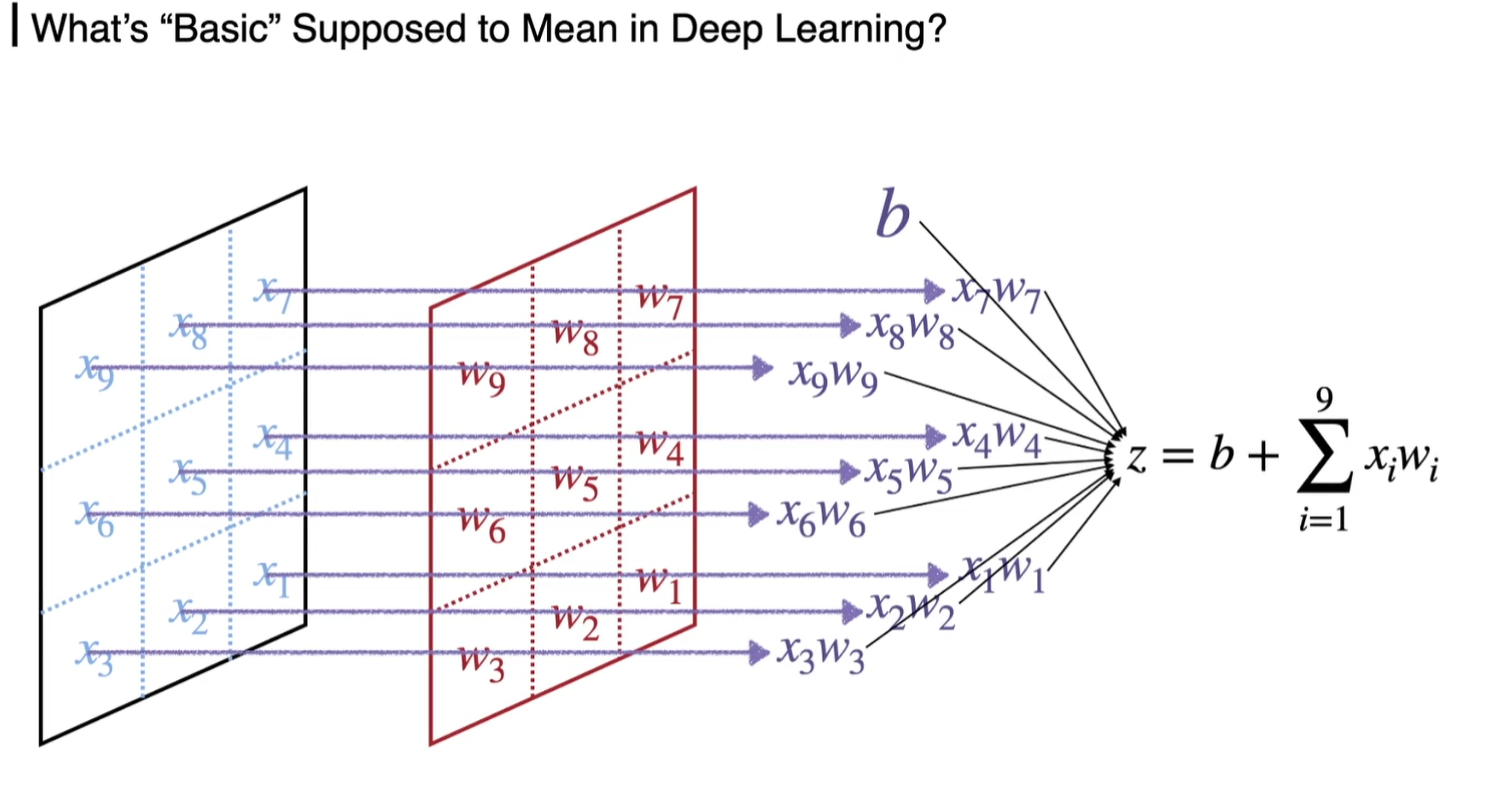

기본적인 artificial neuron의 구조
1. 선형(곱+가중치 더하기) affine function
2. 비선형 activation function 
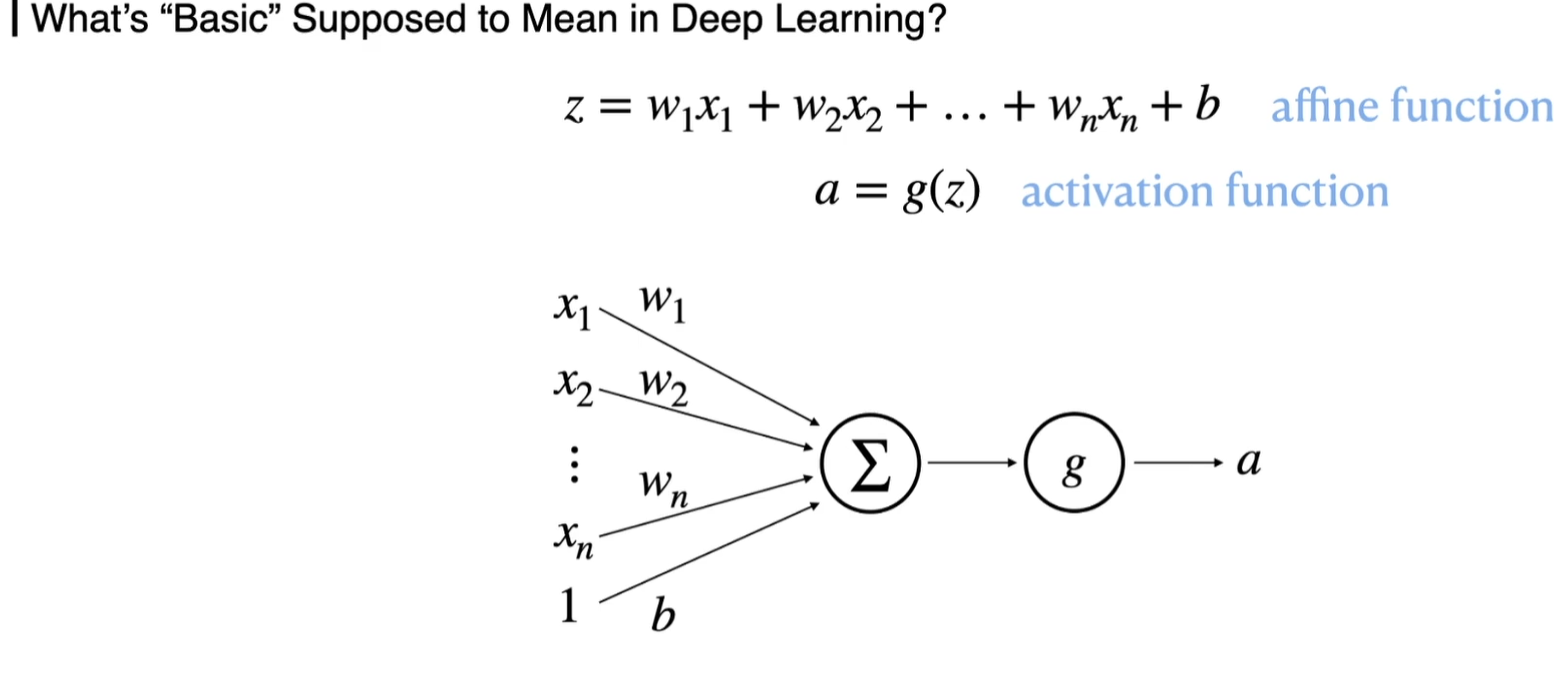

If you torture the data long enough, it will confess to anything 이라는 말 엄청 멋지네.. 역시 데이터 사이언스는 노가다였어



##Python 복습
###1) For loop and If statement

In [ ]:
tmp_list = [(i-10) for i in range(10)]
print(tmp_list)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


In [ ]:
## 최대값을 print하기
M = None
for data in tmp_list:
  if M == None or data > M:  ## A or B 조건에서 A가 맞으면 B를 안 봄. 그래서 B가 문법에 안 맞아도 에러 안 뜸
    M = data
print(M)

-1


In [ ]:
score_list = [(i+10) for i in range(90)]

grade_list = [0,0,0]
for score in score_list:
  if score >= 90:
    grade_list[0] = grade_list[0] +1
  elif score >=80 and score < 90:
    grade_list[1] = grade_list[1] + 1
  elif score <80 and score >= 0:
    grade_list[2] = grade_list[2] +1
  else:
    class ScoreError(Exception):
      pass
    raise ScoreError("Invalid Score")

print(grade_list)

[10, 10, 70]


In [ ]:
## 코드에 에러 처리를 만들어주기

score_list = [(i+10) for i in range(90)] + [-1]

grade_list = [0,0,0]
for score in score_list:
  if score >= 90 and score <100:
    grade_list[0] = grade_list[0] +1
  elif score >=80 and score < 90:
    grade_list[1] = grade_list[1] + 1
  elif score <80 and score >= 0:
    grade_list[2] = grade_list[2] +1
  else:
    class ScoreError(Exception):
      pass
    raise ScoreError("Invalid Score")

print(grade_list)

ScoreError: ignored

###3) Dictionary

In [ ]:
import numpy as np

score_list = np.random.randint(-5, 15, size = (1000))
print(score_list)

M, m = None, None
for score in score_list:
  if M == None or score >M:
    M = score
  if m == None or score <m:
    m = score
print(M-m)

cnt_list = [0 for i in range(M-m)]
print(cnt_list, len(cnt_list))

for score in score_list:
  cnt_list[score-1] = cnt_list[score-1] +1  ##score-1은 인덱스 변경을 위해
  print(cnt_list)

[ 3 13 10  8  1 13 -5 -5 -5 -3  8 13 -3  2  5  6  7  2  6 12 -2 -1 -3  0
  5 14 13  7 14 -2  0  0 13 11 -5 -1  8 -5 14 10 12 11 -2  3 -4  5 -4 -2
 10 -3 -5 11 14  2  5  8 -1 12  2  4  2 -3 -2 13 -2  7  0  7 -4  5  4  6
 -2 10  1  2  0  8 14 -1  8  9  0  0  8 11 -1 10  1  1 -3 10  2 -4  5  0
  2 13  2  0 13  1  4  4 -1  0  5 -2  6 -2  2  6  2 14 10 11 -1 12 -3 -1
 13  3 -2  7 -1  1 11 -1 -4 -4  4 -3 12  0  1  9 14  7 -4  9 11  3  4 -5
 13 -4 13 -3  4  5  9 10 13  2  6 10 11  8  0  5  2 12  3  6  1 -1  2  6
  1  0  7 -2  2  1 -1  3 14  7 12  3  9 14 10  4 -2  8 10  7  4 10 -5 10
 -5  6 -5  1  1  1 -1  4  7 -3 -2 10  6  9  0 11 -5  5  3  6  6  1 11  5
  5  1 -2 -5  9 10 -1 12  2 -2  1 -4  4  5 12 13 -2  0  0  1 10 12 -2 10
 13 -3  7 14 14  5  8  0 -1  4 10 12 11  7 -4 -3  6  2 -5  1 -3  3 14 12
 -3  5  4  8 13 -4 11  9  2  1 -4  8 13  7  5  2 10  3  3  4  6 11 -1  0
 -4  0 13 10 -3 10  4  2 -5 -5 12  4 -5 -3  1  3 12 14 12  2  8 -1  5  2
 10  1 -2 14 10 12 -3  7 -1 -5  9  7  2  1  9  3  0

In [ ]:
## 위처럼 긴 코드를 dictionary로 바꿔서 명확하게 표현해보자

tmp_dict = dict()
tmp_dict['A'] = 10
tmp_dict['B'] = 20
tmp_dict['F'] = 100
print(tmp_dict)

{'A': 10, 'B': 20, 'F': 100}


In [ ]:
cnt_dict = dict()

#print(cnt_dict[0]) <-요건 오류가 뜬다. 왜냐면 현재 딕셔너리가 비어있어서 key 0값이 없으니까
print(cnt_dict.get(10,0)) #dict.get(n,a)은 key n 값의 value를 return하는건데, 해당 value가 없으면 a 값을 넣어준다.
 

0


In [4]:
score_list = np.random.randint(0, 20, size = (1000))
print(score_list)

cnt_dict = dict()
for score in score_list:
  cnt_dict[score] = cnt_dict.get(score, 0) +1

print(cnt_dict) ## 요렇게 리스트를 개수에 맞게 예쁘게 정리할 수 있다!

[11 12 12 10  6 18  1  6  1  1 15 10 16  2 18  4  1 17  3  9  9  8 16  0
  0  3  3 14 18 19 16 12  1  8  1  5 10 13  7  6  2  7 11 19  6  9  4  2
  9 16 10  7  6  5  7  6 14  9 16  0  0 11 16 11 10  8 17  8 16 15  9 15
 14 15 11  7 10  0  8 16 17  4 14 13  9  7  3  0 10 16  4  9  2 15 11  5
  4  6  2 13 10 19 10 12 13 10  0 15 17  2 19  2  6 19 10  7 12  5 10 14
  6 12  1  1 15 11 13  2 11 13 14  4 16 16 17 11 12 13 12  5  1 11 11 11
  0  0  4 10 12  6  7  7 19 13 11 11 13  8  6  1  3  7 16  2  0 15 15  9
 15 17 13 10 14 11  8 13 10 13 16 10 12 12 11 19 19 16  4 16 11  4  2 10
 13 14  6  9  4  5  5  7 16  7  6 10 12  0 10  1  0  1 12  9 19  1 19  3
 19  9  7 12 12  6 19 15  5  6 19 11  2 10  1 12  1 13 12 10  8  4  1 12
 17 15  2 14 12  8 19  3 19 17 14 13  7 14 10  7  4  0 10  3  6  4 15  3
  7  5  2  3 14  6 14 17  9 18 17 16  3  7  6 19 19  9 14  2  0  0 13  9
 15  3  3 12  4 15  6 16  7  8 16  1 19  4 17  7  3  1 13  8  4 19  9  0
  1 11  2  5 15 14  4 17 17 13  3  4  4  0 18  2 16

###3)Function

In [6]:
def adder(operand1, operand2):
  print("operand1:", operand1)
  print("operand1:", operand2)
  print("addition:", operand1+operand2)

adder(10, 30) # 10은 argument, 함수 안의 operand1/2는 parameter에 해당

operand1: 10
operand1: 30
addition: 40


In [9]:
tmp_list = [i for i in range(100)]
print(tmp_list, '\n')

def extractor(input_list, cutoff_min, cutoff_max):
  return_list = []
  for val in input_list:
    if val >=cutoff_min and val < cutoff_max:
      return_list.append(val)
    return return_list

for cutoff_min in range(0, 70, 10):
  e_list = extractor(tmp_list, cutoff_min, cutoff_min + 10)
  print(e_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0]
[]
[]
[]
[]
[]
[]


In [10]:
## global, local variable

a = "Global!"

def tmp_function():
  a = "Local!"
  print(a)

tmp_function()

### global code 사용하는 이유. parameter를 줄이기 위해서...
## 만약 어떤 함수 안에서 100을 쓰고 싶다면 그 안에서 또 local 값을 주는 것보다는 global로 100을 정의해놓고 계속 참조해서 쓰는 게 좋음

Local!


###3)Class

In [11]:
class test_class:
  pass

tmp = test_class() ##class를 만들어놓고 instance( tmp에 해당 )로 찍어내는 걸 instantiation으로 부름
print(tmp)

In [12]:
class test_class:
  def __init__(self): ## class 안에 함수를 만들어내는 것을 method라고 부르고, 
  ##underscore 두 개로 묶는 걸 magic method라고 부름 (__init__은 대표적인 매직 메서드)
    print("Hello")

tmp = test_class() ##class를 만들어놓고 instance( tmp에 해당 )로 찍어내는 걸 instantiation으로 부름


Hello


In [13]:
class test_class:
  def __init__(self, x, y): ## magic method는 input을 대신 받아주는 역할도 할 수 있음
    print(x,y)
tmp = test_class(10, 20)

10 20


In [15]:
class test_class:
  def __init__(self, x, y):
    self.x = x  ## 해당 클래스가 가지고 있는 x, y를 정의 (instance variable로 불림)
    self.y = y

  def adder(self):  ## self밖에 안 받았는데 x, y를 사용할 수 있음
  ## self로 정의한 variable을 전부 가져옴
    print(self.x + self.y)  ## 즉 instance variable은 class 안의 모든 method가 공유할 수 있는 variable임
    
tmp = test_class(10, 20)
print(tmp.x, tmp.y) ## tmp가 가지고 있는 x와 y를 출력해라

tmp.adder()  ## tmp의 adder method를 실행

10 20
30


In [17]:
## instance variable의 업데이트

class test_class:
  def __init__(self, x, y):
    self.x = x
    self.y = y
    
    self.add = None

  def adder(self):
    self.add = self.x + self.y

tmp = test_class(10, 20)
print(tmp.x, tmp.y, tmp.add) ## adder를 사용하지 않고 바로 불렀을 땐 init 메소드만 실행되어 있음 (add가 None)
## __init__은 class와 함께 무조건 호출되는 메소드로 보면 될 듯?
tmp.adder()
print(tmp.x, tmp.y, tmp.add)  ## adder method를 실행시키면 add가 10+20으로 업데이트 되어있음

10 20 None
10 20 30


In [3]:
class test_class:
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def adder(self):
    return self.x + self.y

  def subtractor(self):
    return self.x - self.y

  def multiplier(self):
    return self.x * self.y

tmp = test_class(10, 20)
add = tmp.adder()
sub = tmp.subtractor()
mul = tmp.multiplier()

print(add, sub, mul)

30 -10 200


In [6]:
input_data = np.random.randint(0, 10, size = (10,))
print(input_data)

print(input_data.mean())
print(input_data.std())

[1 2 8 9 3 2 6 7 2 7]
4.7
2.8301943396169813


In [2]:
### class 전체가 공유하는 것이 class variable

class node:
  node_cnt = 0

  def __init__(self, x, y):
    self.x, self.y = x,y

    node.node_cnt += 1
  
node1 = node(10,20)
print(node1.x, node1.y, node1.node_cnt) 
node2 = node(100, 200)
print(node2.x, node2.y, node2.node_cnt) 
### node1과 node2의 x,y는 다름 (즉 instance variable은 하나의 instance 안에서만 공유하는 값이다)
### 그러나 node_cnt는 둘 다 똑같은 값을 갖게 되는데 (2), 이건 node_cnt가 class variable이라서

10 20 1
100 200 2


In [4]:
class node:
  node_cnt = 0

  def __init__(self, x, y):
    self.x, self.y = x,y
    self.add = None

    self.adder()

    node.node_cnt += 1

  def adder(self):
    self.add = self.x + self.y

node1 = node(10,20)
print(node1.x, node1.y, node1.add) 
node2 = node(100, 200)
print(node2.x, node2.y, node2.add) 
node3 = node(200, 300)
print(node3.x, node3.y, node3.add)

10 20 30
100 200 300
200 300 500


In [13]:
### python은 private 개념이 없다
### 사용자에게 내부함수는 underscore을 붙여서, 아닌 것은 안 붙여서 수정할 함수와 아닌 함수를 구별

class calculator:
  def __init__(self, x, y, operator):
    self._x = x
    self._y = y
    self._operator = operator

    self.result = None

    if self._operator == '+':
      self._adder()
    elif self._operator == '*':
      self._multiplier()

  def _adder(self):
    self.result = self._x +self._y

  def subtractor(self):
    self.result = self._x - self._y

  def _multiplier(self):
    self.result = self._x * self._y

  def get_result(self):
    return self.result

tmp = calculator(10, 20, '*')
result = tmp.get_result()
print(result)

200


In [14]:
class tmp_class:
  def __init__(self):
    self.x = 0
    self.y = 0
  def method1():
    pass
  def method2():
    pass

tmp = tmp_class()
print(dir(tmp))

#%%

a = 10 + 20j
print(dir(a))

print(a.real)
print(a.imag)

b = [5,2,3]
print(dir(b))

print(b.append(10))
print(b)
b.sort(reverse = True) ## 아 얘네들도 다 class로 구현이 되어있구나~ 이런걸 알 수 있음
print(b)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'method1', 'method2', 'x', 'y']
['__abs__', '__add__', '__bool__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__int__', '__le__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__pos__', '__pow__', '__radd__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__rpow__', '__rsub__', '__rtruediv__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', 'conjugate', 'imag', 're

In [27]:
score_list = [50,60,30,90,95,20,15,65,77]

class grader:
  def __init__(self, score_list):
    self.score_list = score_list

    self._grade_list = None
    self._cutoff_list = None

    self._init_grader()

  def _init_grader(self):
    self._grade_list = ['A', 'B', 'C', 'F']
    self._cutoff_list = [100, 90, 80, 70, 0]

  def score2grade(self):
    return_grade_list = []
    for score_idx, score in enumerate(self.score_list):
      if score>= self._cutoff_list[1] and score < self._cutoff_list[0]:
        return_grade_list.append(self._grade_list[0])
      elif score >= self._cutoff_list[2] and score < self._cutoff_list[1]:
        return_grade_list.append(self._grade_list[1])
      elif score >= self._cutoff_list[3] and score < self._cutoff_list[2]:
        return_grade_list.append(self._grade_list[2])
      elif score >= self._cutoff_list[4] and score < self._cutoff_list[3]:
        return_grade_list.append(self._grade_list[3])
      else:
        class scoreError(Exception):
          pass
        raise scoreError("Invavlid Score Detected!")

tmp = grader(score_list)
tmp.score2grade()
print(tmp._grade_list)
print(tmp._cutoff_list)
print(tmp.return_grade_list)

['A', 'B', 'C', 'F']
[100, 90, 80, 70, 0]


AttributeError: ignored

(200, 1) (200, 1)


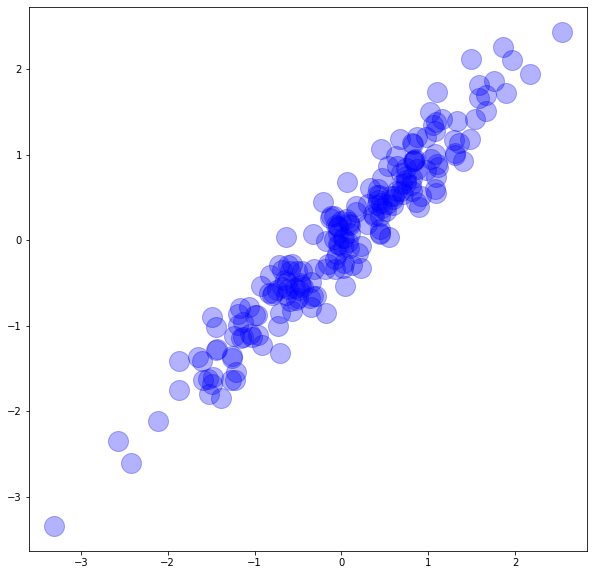

In [33]:
### Class로 Dataset Generator 만들기
import numpy as np
import matplotlib.pyplot as plt

class dataset_generator:
  def __init__(self, n_sample = 100, noise = 0):
    self._n_sample = n_sample
    self._noise = noise

  def make_dataset(self):
    x_data = np.random.normal(0, 1, size = (self._n_sample, 1))
    y_data = x_data + self._noise * np.random.normal(0, 1, size = (self._n_sample, 1))
    return x_data, y_data

data_gen = dataset_generator(n_sample = 200, noise = 0.3)
x_data, y_data = data_gen.make_dataset()

print(x_data.shape, y_data.shape)

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(x_data, y_data, 'bo',
        alpha = 0.3,
        markersize = 20)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class dataset_generator:
  def __init__(self, n_sample = 100, noise = 0):
    self._n_sample = n_sample
    self._noise = noise

  def make_dataset(self):
    x_data = np.random.normal(0, 1, size = (self._n_sample, 1))
    y_data = x_data + self._noise * np.random.normal(0, 1, size = (self._n_sample, 1))
    return x_data, y_data

data_gen = dataset_generator(n_sample = 200, noise = 0.3)
x_data, y_data = data_gen.make_dataset()

print(x_data.shape, y_data.shape)

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(x_data, y_data, 'bo',
        alpha = 0.3,
        markersize = 20)